# Introduction to Community Modeling

Author: Daniel Machado, NTNU

License: [CC BY-SA 4.0](http://creativecommons.org/licenses/by-sa/4.0/)

-------

In this tutorial:

- You will learn how to perform flux balance analysis of microbial communities
using a model of the [central carbon metabolism of *E. coli*](https://journals.asm.org/doi/10.1128/ecosalplus.10.2.1).

- You will use the [ReFramed](https://github.com/cdanielmachado/reframed) python library for metabolic modeling. 

## Step 1: Setting up a community

We will create a synthetic microbial consortium with two *E. coli* mutants growing in minimal medium. In one of the mutants we will knockout the glucose transporter and in the other we will knockout the ammonium transporter.

![synthetic community](../files/synthetic_community.png)

As usual, we start by loading the model for the wild-type:

In [1]:
from reframed import load_cbmodel
wildtype = load_cbmodel('GEMs/e_coli_core.xml')

Now we create our two mutants (`glc_ko` and `nh4_ko`):

In [2]:
glc_ko = wildtype.copy()
glc_ko.id = 'glc_ko'
glc_ko.set_flux_bounds('R_GLCpts', 0, 0)

nh4_ko = wildtype.copy()
nh4_ko.id = 'nh4_ko'
nh4_ko.set_flux_bounds('R_NH4t', 0, 0)

**ReFramed** has some basic functionality for working with microbial communities, one is the `Community` class to create microbial communities from a list of models of individual species: 

In [3]:
from reframed import Community
community = Community('ecoli_pair', [glc_ko, nh4_ko])

This community model ignores the environmental conditions that were specified in the original models (since these could be very different). 

To make our life easier, we will extract the nutrient composition specified in the wild-type model to use later.

In [4]:
from reframed import Environment

M9 = Environment.from_model(wildtype)

print(f"Environment compounds: {', '.join(M9.get_compounds())}")

Environment compounds: co2, glc__D, h, h2o, nh4, o2, pi


## Step 2: Simulation using (conventional) FBA

A very simple way to simulate a microbial community is to merge the individual models into a single model that mimics a "super organism", where each microbe lives inside its own compartment, and run a (conventional) FBA simulation for this *super organism*.

In [5]:
from reframed import FBA

super_oganism = community.merged_model
solution = FBA(super_oganism, constraints=M9)

print(solution)
solution.show_values(pattern='R_EX')

Objective: 0.831195550185812
Status: Optimal

R_EX_glc__D_e -10
R_EX_h2o_e    30.6828
R_EX_h_e      16.6738
R_EX_nh4_e   -4.53234
R_EX_o2_e    -23.6671
R_EX_pi_e    -3.05772
R_EX_co2_e    24.6281


We can see that the model predicts a growth rate (total biomass per hour) similar to the wild-type, with an efficient consumption of glucose and ammonia that results in respiratory metabolism.

But what is each organism doing, and are both organisms actually growing at the same rate?

Let's print the (non-zero) fluxes for each organism:

In [6]:
solution.show_values(pattern='_glc_ko', sort=True)

R_ALCD2x_glc_ko -12.1508
R_ETOHt2r_glc_ko -12.1508
R_CO2t_glc_ko -9.06469
R_GLUDy_glc_ko -4.53234
R_GLUt2r_glc_ko -4.53234
R_SUCOAS_glc_ko -4.53234
R_PTAr_glc_ko -1.44622
R_ACKr_glc_ko  1.44622
R_ACt2r_glc_ko  1.44622
R_O2t_glc_ko  2.26617
R_ACALD_glc_ko  3.08613
R_H2Ot_glc_ko  3.08613
R_ACONTa_glc_ko  4.53234
R_ACONTb_glc_ko  4.53234
R_AKGDH_glc_ko  4.53234
R_AKGt2r_glc_ko  4.53234
R_CS_glc_ko   4.53234
R_CYTBD_glc_ko  4.53234
R_FUM_glc_ko  4.53234
R_ICDHyr_glc_ko  4.53234
R_MDH_glc_ko  4.53234
R_NH4t_glc_ko  4.53234
R_SUCDi_glc_ko  4.53234
R_ATPS4r_glc_ko  5.30387
R_ATPM_glc_ko  8.39
R_ACALDt_glc_ko  15.2369


In [7]:
solution.show_values(pattern='_nh4_ko', sort=True)

R_H2Ot_nh4_ko -33.7689
R_PGK_nh4_ko -16.4135
R_CO2t_nh4_ko -15.5634
R_ACALDt_nh4_ko -15.2369
R_PGM_nh4_ko -15.17
R_AKGt2r_nh4_ko -4.53234
R_ACALD_nh4_ko -3.08613
R_RPI_nh4_ko -1.9744
R_SUCOAS_nh4_ko -1.45779
R_ACKr_nh4_ko -1.44622
R_ACt2r_nh4_ko -1.44622
R_GLNS_nh4_ko  0.212537
R_GLUDy_nh4_ko  0.212537
R_BIOMASS_Ecoli_core_w_GAM_nh4_ko  0.831196
R_TKT2_nh4_ko  0.928175
R_TALA_nh4_ko  1.22824
R_TKT1_nh4_ko  1.22824
R_PTAr_nh4_ko  1.44622
R_AKGDH_nh4_ko  1.45779
R_FUM_nh4_ko  1.45779
R_MDH_nh4_ko  1.45779
R_SUCDi_nh4_ko  1.45779
R_RPE_nh4_ko  2.15641
R_ACONTa_nh4_ko  2.35457
R_ACONTb_nh4_ko  2.35457
R_CS_nh4_ko   2.35457
R_ICDHyr_nh4_ko  2.35457
R_PYK_nh4_ko  2.35668
R_PPC_nh4_ko  2.38187
R_PIt2r_nh4_ko  3.05772
R_G6PDH2r_nh4_ko  4.13081
R_GND_nh4_ko  4.13081
R_PGL_nh4_ko  4.13081
R_GLUt2r_nh4_ko  4.53234
R_PGI_nh4_ko  5.69879
R_FBA_nh4_ko  7.79627
R_PFK_nh4_ko  7.79627
R_TPI_nh4_ko  7.79627
R_ATPM_nh4_ko  8.39
R_GLCpts_nh4_ko  10
R_PDH_nh4_ko  10.0021
R_ALCD2x_nh4_ko  12.1508
R_ETOHt2r_

Actually it seems that only one of the organisms is growing while the other has an active metabolism (it exchanges metabolites with the environment and with the other organism) performing the role of a bioconverter, but none of the flux is used for growth. 

> Do you think this would be a stable consortium ?

# Step 2.5: production envelope

<AxesSubplot: xlabel='Community growth rate', ylabel='R_EX_succ_e'>

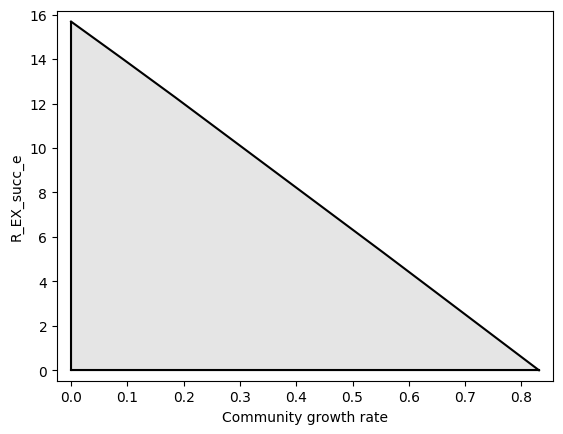

In [8]:
from reframed import plot_flux_envelope

super_oganism.reactions.R_EX_o2_e.lb = 0

plot_flux_envelope(super_oganism, super_oganism.biomass_reaction, 'R_EX_succ_e', constraints=M9)

## Step 3: Community Simulation with SteadyCom

**SteadyCom** by [Chan, et al (2017)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005539) is a recent community simulation method that takes into account the fact that to reach a stable composition the organisms need to grow at the same *specific growth rate* (1/h), which means that the *absolute growth rate* (gDW/h) of each organism is proportional to its *abundance* at steady-state (gDW).

Let's simulate the same community using SteadyCom:

In [9]:
from reframed import SteadyCom
solution = SteadyCom(community, constraints=M9)

In this case the solution object shows the overall community growth rate and the relative abundance of each species:

In [10]:
print(solution)

Community growth: 0.873046875
glc_ko	0.024884385078817017
nh4_ko	0.9751156149211829


The `solution` object for community simulations implements a few additional features, such as enumerating all the cross-feeding interactions:

In [11]:
solution.cross_feeding(as_df=True).dropna().sort_values('rate', ascending=False)

,donor,receiver,compound,rate
12,nh4_ko,glc_ko,M_pyr_e,9.728158
6,glc_ko,nh4_ko,M_lac__D_e,9.565084
13,nh4_ko,glc_ko,M_ac_e,5.727365
4,nh4_ko,glc_ko,M_h_e,5.579142
15,nh4_ko,glc_ko,M_akg_e,4.704342
1,glc_ko,nh4_ko,M_glu__L_e,4.642087
14,glc_ko,nh4_ko,M_acald_e,0.607914


We can plot the fluxes of each mutant in a map to help with interpretation of the results:

In [14]:
from reframed import fluxes2escher
fluxes2escher(solution.internal['glc_ko'])

Builder(reaction_data={'ACALD': -0.6079141221187285, 'ACALDt': -0.6079141221187285, 'ACKr': 5.7273649981957195…

In [15]:
fluxes2escher(solution.internal['nh4_ko'])

Builder(reaction_data={'ACALD': 0.6079141221187285, 'ACALDt': 0.6079141221187285, 'ACKr': -5.7273649981957195,…

**Exercise:** Look more closely at the compounds that are exchanged between the two mutants and also at their relative abundance. Is this what you expected? Do you think there could be different solutions?

## Step 4: Explore alternative solutions

Unfortunately, one limitation of **SteadyCom**, which is exemplified by [Chan, et al (2017)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005539) in Figure 3 (reproduced below), is the variability in the solution space when the community is not growing at the maximum (theoretical) growth rate.

![variability](../files/steadycom_variability.png)

> Would you expect a synthetic community to grow at its maximum growth rate?

**ReFramed** implements a variability analysis function for the SteadyCom solution space, let's see what happens if the community is growing at 90% of the theoretical maximum:

In [16]:
from reframed import SteadyComVA
variability = SteadyComVA(community, obj_frac=0.9, constraints=M9)

print('Strain\tMin\tMax')
for strain, (lower, upper) in variability.items():
    print(f'{strain}\t{lower:.1%}\t{upper:.1%}')

Strain	Min	Max
glc_ko	0.4%	98.3%
nh4_ko	1.7%	99.6%


As you can see, there is a really large variability in this solution space. This means that we know in theory the two mutants **can** cooperate and survive in minimal media, but there is still a lot of uncertainty with regard to **how** they will achieve a stable consortium.

> How do you think we can reduce this uncertainty?

In [ ]:
# Feel free to play around with these examples.
# Type your own code here...